In [1]:
import sys

sys.path.append("..")

from tools.tools import load_sample, preprocess_data
from tools.display_tools import plot_current_state_of_graph, fancy_plot, bare_fancy_plot
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

# Graphics that we have included in our paper
 (excluding experimental results. Check the experiment repo for this)

## Displaying graphs

<Figure size 640x480 with 0 Axes>

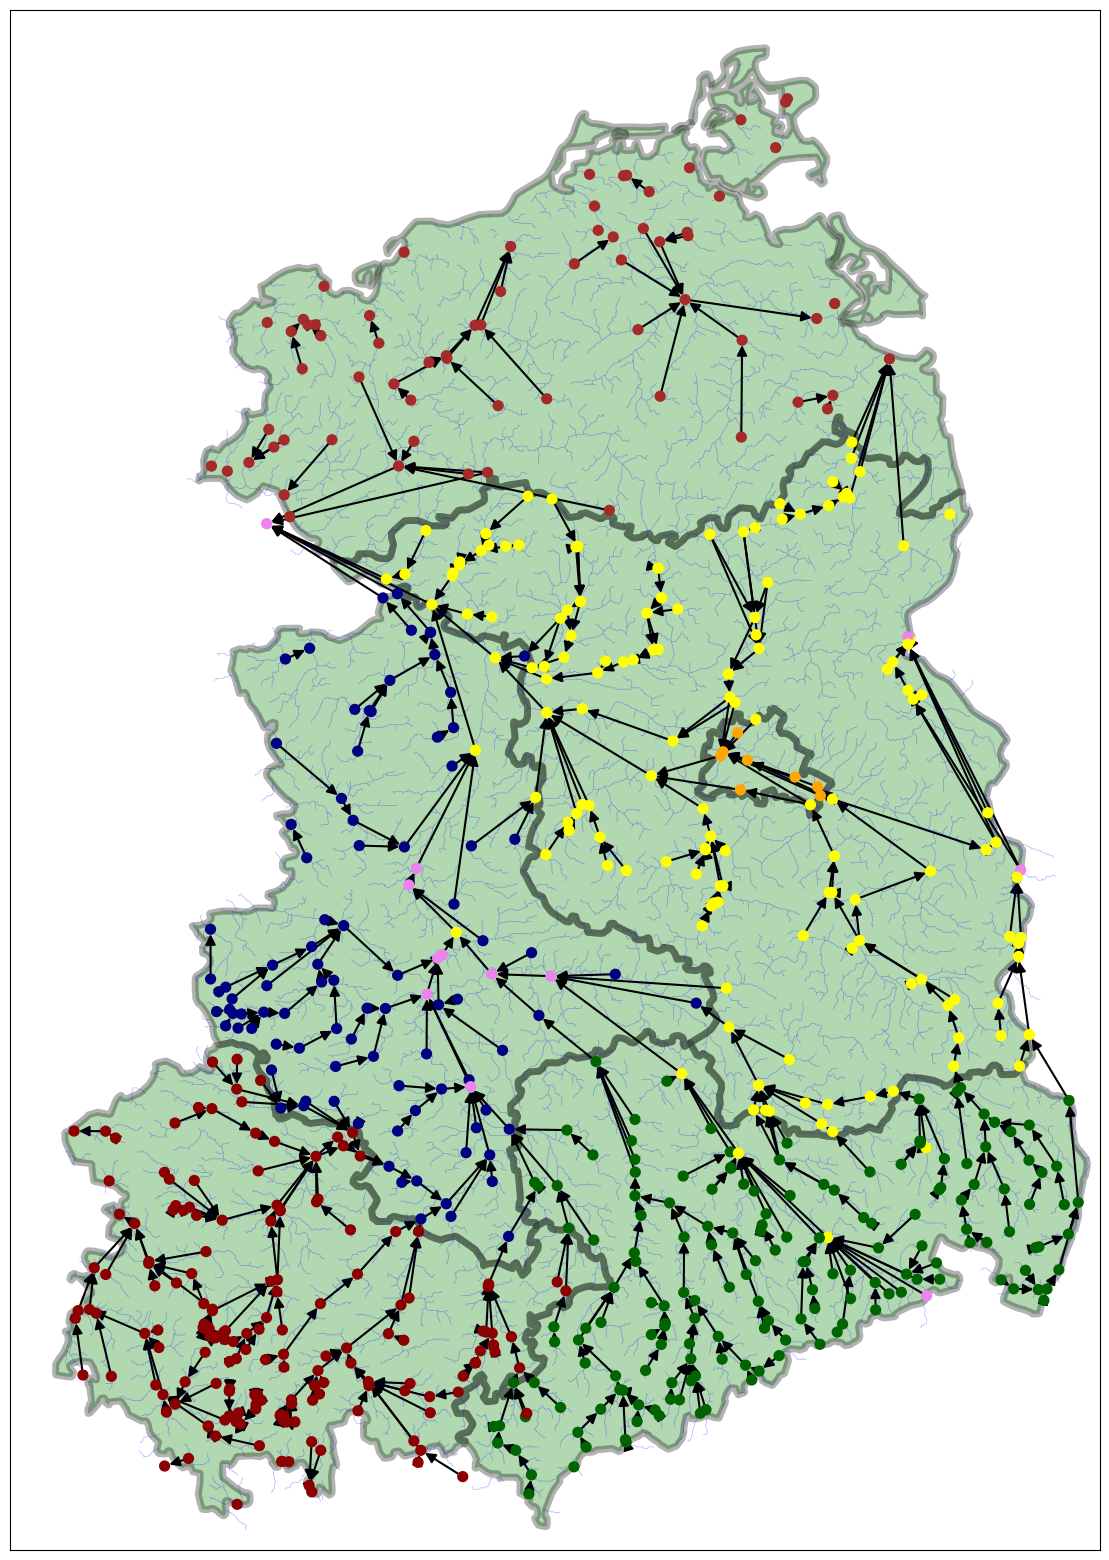

In [70]:
G_eg = pickle.load(open("../product/rivers_east_germany.p", "rb"))
plt.tight_layout()
plot_current_state_of_graph(
    G_eg,
    node_size=50,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    save="east.png", #"eg_map_alt",
    river_map=True,
    ger_map=True,
    width=1.5,
    label=False,
    arrowsize=15,
    fs=(15, 20),
    font_size=1,
    ger_path = "../product/visualization/east_germany/east_german_map.shp",
    river_path = "../product/visualization/east_germany/river_east_german_map.shp",
    title=""
)

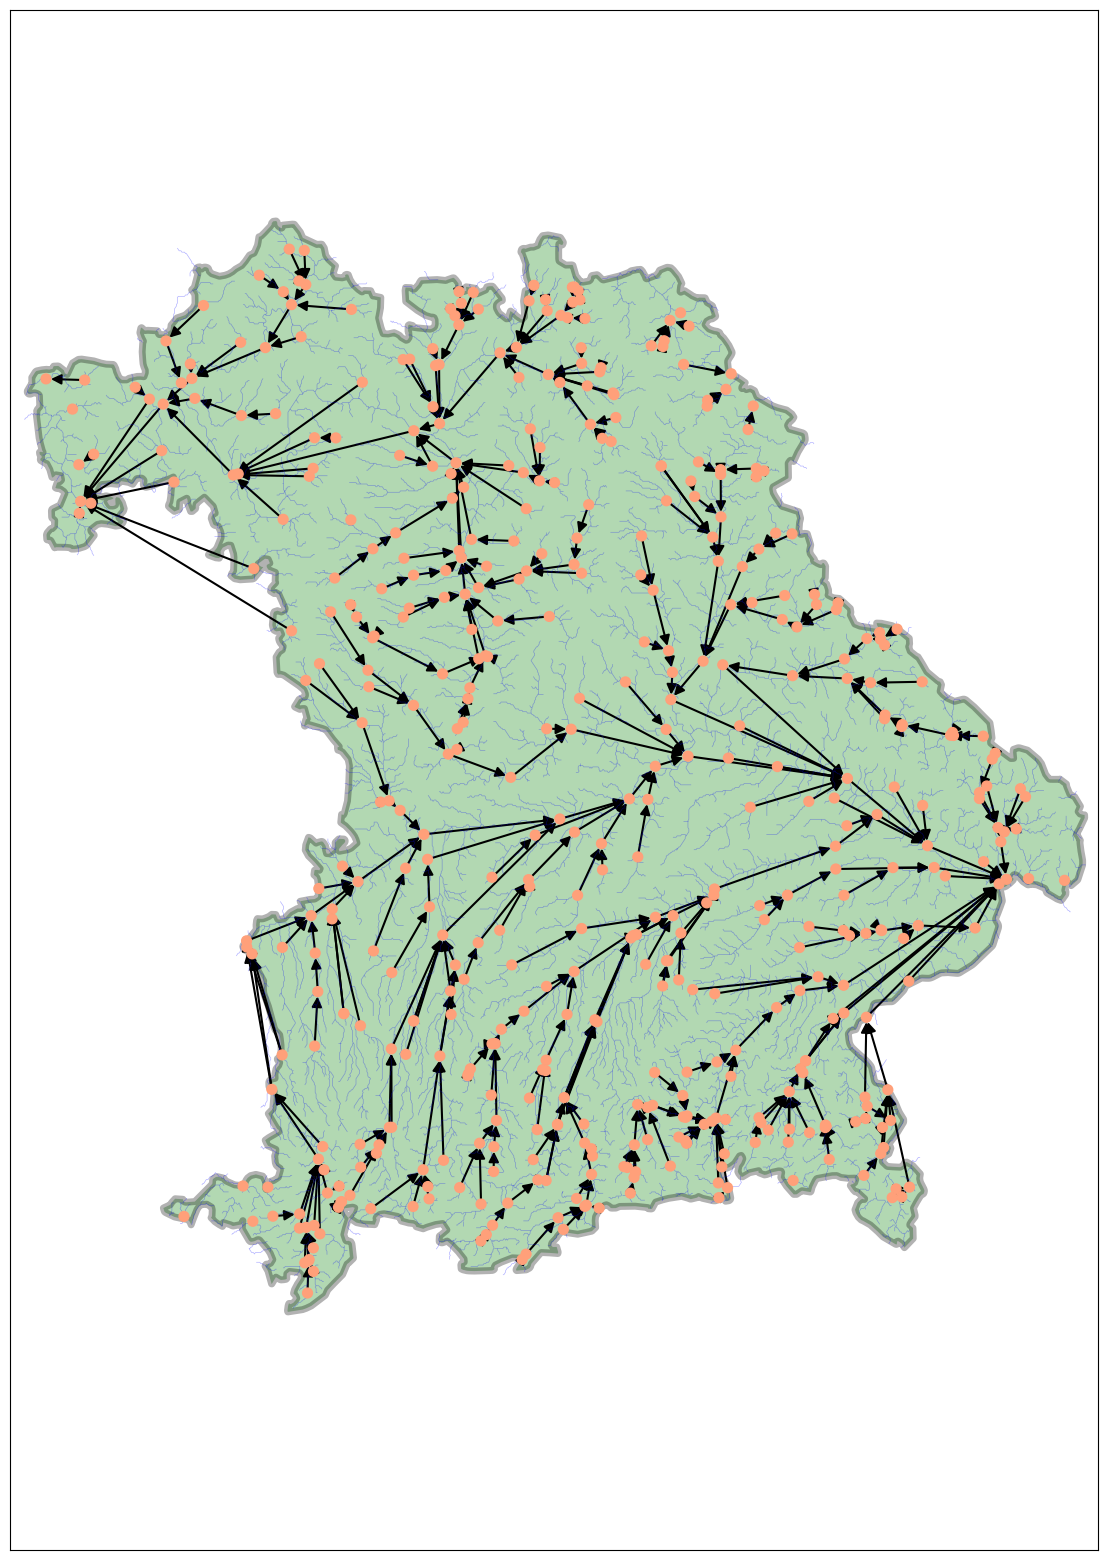

In [10]:
G_b = pickle.load(open("../product/rivers_bavaria.p", "rb"))
plot_current_state_of_graph(
    G_b,
    lim=(46.55, 51.2),
    limx=(8.9, 13.9),
    node_size=50,
    save="bav.png", #"eg_map_alt",
    river_map=True,
    ger_map=True,
    width=1.5,
    label=False,
    arrowsize=15,
    fs=(15,20),
    hardcode_colors = ["lightsalmon" for _ in range(len(G_b.nodes))],
    font_size=1,
    ger_path = "../product/visualization/bavaria/bavaria_map.shp",
    river_path = "../product/visualization/bavaria/river_bavaria_map.shp",
    title= "",
    
)

<Figure size 640x480 with 0 Axes>

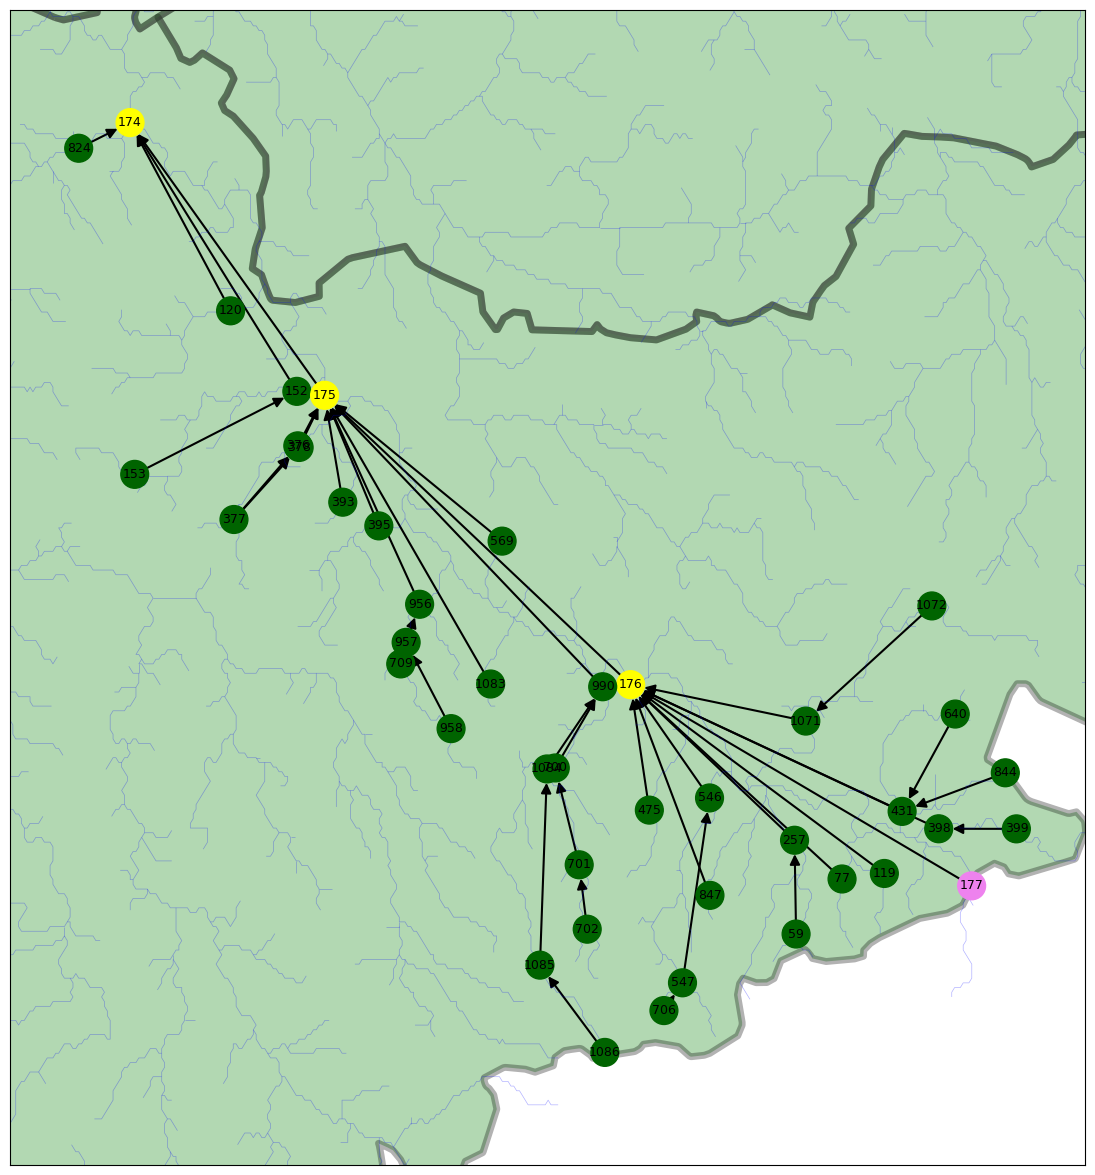

In [ ]:
G_eg = pickle.load(open("../product/rivers_flood.p", "rb"))

plt.tight_layout()
plot_current_state_of_graph(
    G_eg,
    dpi=300,
    autozoom=0.1,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    node_size=400,
    save="flood.svg", #"eg_map_alt",
    river_map=True,
    ger_map=True,
    width=1.5,
    label=True,
    arrowsize=15,
    font_color="black",
    fs=(15, 15),
    font_size=9,
    ger_path = "../product/visualization/east_germany/east_german_map.shp",
    river_path = "../product/visualization/east_germany/river_east_german_map.shp",
    title="",
    #rotate_by=180
    )



## Data example

In [3]:
# Load the raw ts data and the labels for a specific sample:
ds  =pickle.load(open("../datasets/random_3" + "/east.p", "rb"))

cmap = mpl.colormaps['viridis']
base_c = cmap(np.linspace(0, 1, 4))

example = ds[13]
data = load_sample(p= "../product/rivers_ts_east_germany.csv", which= example)

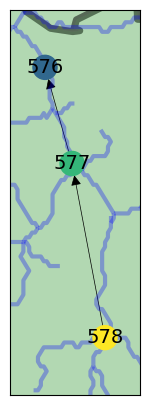

In [4]:
plot_current_state_of_graph(
    example,
    autozoom=0.05,
    lim=(50.1, 54.8),
    limx=(9.65, 25.1),
    node_size=300,
    save="sample.png",
    river_map=1,
    ger_map=1,
    width=0.5,
    arrowsize=15.5,
    fs=(5, 5),
    font_size=14,
    ger_path = "../product/visualization/east_germany/east_german_map.shp",
    river_path = "../product/visualization/east_germany/river_east_german_map.shp",
    hardcode_colors = list(base_c)[1:],
    river_width=3,
    title=None

)

In [5]:
# Run some standard preprocessing steps
sample_data = preprocess_data(
    data,
    resolution="24h",
    interpolate=False,
    normalize=False,
)

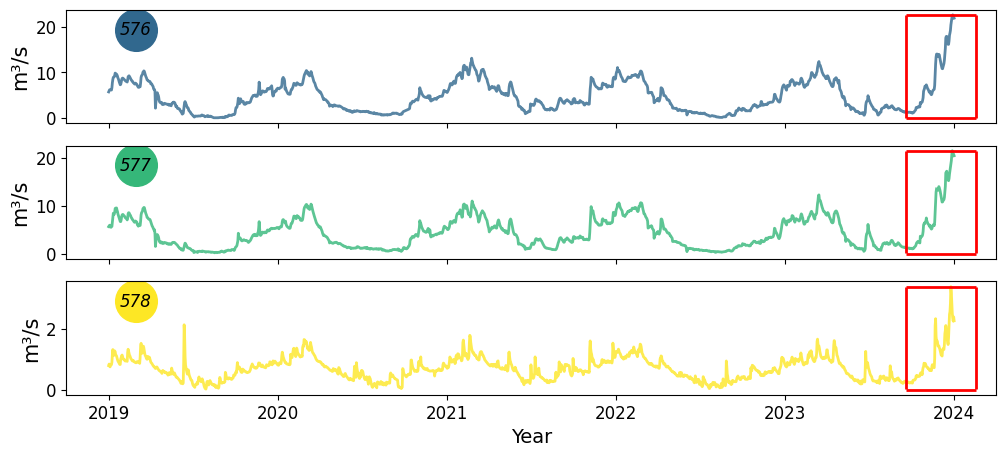

In [6]:
axs = fancy_plot(sample_data, base_c,save="ts.png", emph=19620)

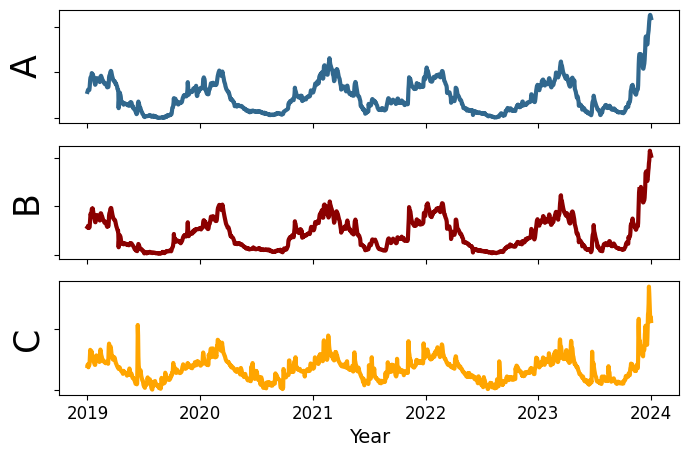

In [86]:
axs = bare_fancy_plot(sample_data, save="ts_bare.svg", base_c=["green", base_c[1], "darkred","orange"])

## Example of graph sets

In [5]:
import networkx as nx
from matplotlib.pyplot import savefig

In [6]:
G_eg = pickle.load(open("../product/rivers_east_germany.p", "rb"))
ds  =pickle.load(open("../datasets/random_3" + "/east.p", "rb"))

In [7]:
def draw_g(G,name="demo.png", pos=None, arrowsize=100,edge_color="black", color=None):
    
    if not color:
        colors = []
        for x in G.nodes:
            colors.append(G.nodes[x]["c"])
    else:
        colors = color
    
    plt.ylim([0,3])
    plt.xlim([0,3])
        
    nx.draw_networkx(
        G,
        with_labels=False,
        node_size=5000,
        arrows=True,
        node_color=colors,
        arrowsize=arrowsize,
        width=8,
        pos=pos,
        edge_color = edge_color

    )

    savefig(name, transparent=True,bbox_inches='tight')

In [8]:
colors = list(set([G_eg.nodes[x]["c"] for x in  G_eg.nodes]))

[116, 1118, 1119]


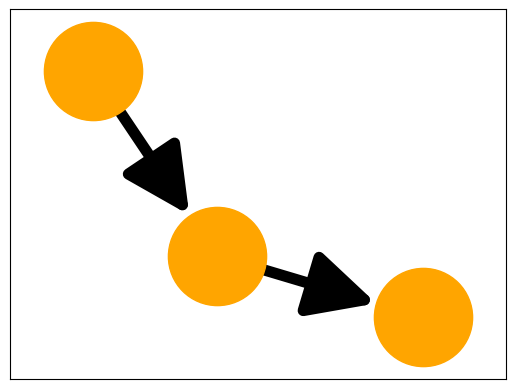

In [29]:

print(ds[23].nodes)
draw_g(ds[23], name="root_cause.png", pos={116:[2.5,0.5],1118:[1.25,1.],1119:[0.5,2.5]}, color = colors[0])

[328, 185, 329]


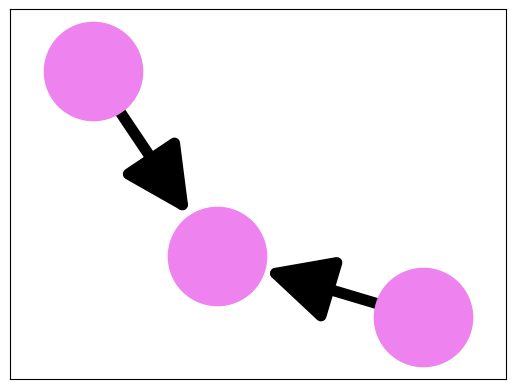

In [31]:
print(ds[1].nodes)
draw_g(ds[1], name="random.png", pos={328:[1.25,1.],329:[2.5,0.5],185:[0.5,2.5]}, color = colors[4])

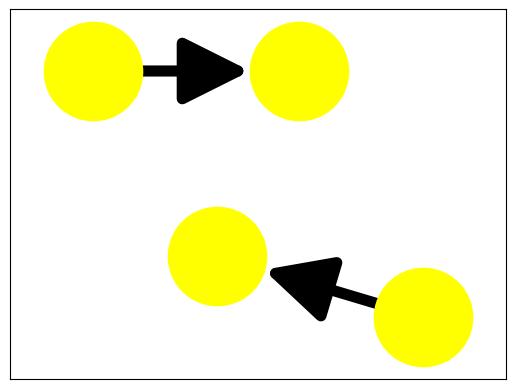

In [34]:
draw_g(G_eg.subgraph([12,13,91,90]), name="disjoint.png", pos={12:[1.25,1.],13:[2.5,0.5],91:[0.5,2.5], 90:[1.75,2.5]}, color = colors[3])

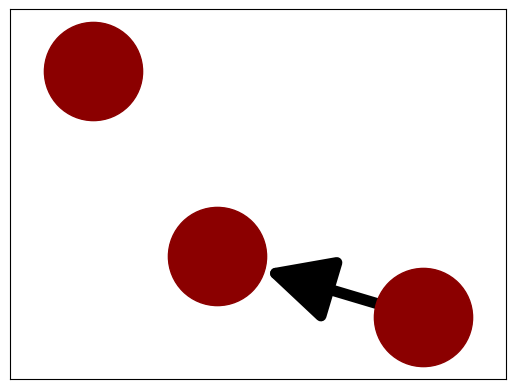

In [35]:
draw_g(G_eg.subgraph([12,13,91]), name="random+1.png", pos={12:[1.25,1.],13:[2.5,0.5],91:[0.5,2.5]}, color = colors[1])

[328, 185, 329]


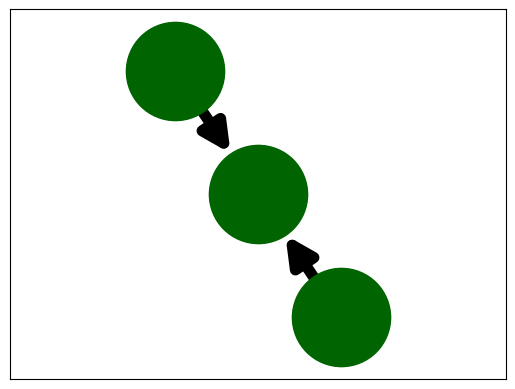

In [36]:
print(ds[1].nodes)
draw_g(ds[1], name="close.png", pos={328:[1.5,1.5],329:[2.,0.5],185:[1,2.5]}, arrowsize=40, color = colors[2])

45
[(45, 44), (45, 201)]
[(201, 565)]


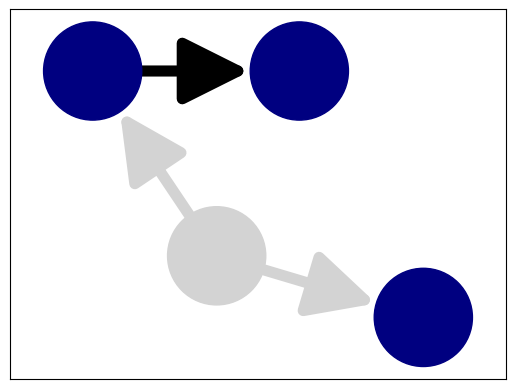

In [37]:
for x in G_eg.nodes: 
    if len(list(G_eg.successors(x))) > 1: 
        print(x)
        print(G_eg.edges(x))
        break
print(G_eg.edges(201))

draw_g(G_eg.subgraph([45, 44,201, 565]), 
       name="confounder.png",
       pos={45:[1.25,1.],44:[2.5,0.5],201:[0.5,2.5], 565:[1.75,2.5]},
       edge_color=["black","lightgray","lightgray"],
       color= ["Navy","Navy","Navy", "lightgray"]
       )